### Zachary's Karate Club

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.lines import Line2D

from hiveplotlib import Axis, BaseHivePlot
from hiveplotlib.converters import networkx_to_nodes_edges
from hiveplotlib.viz import axes_viz, edge_viz, node_viz

%matplotlib inline

#### Background

From 1970-1972, Wayne W. Zachary observed a karate club split into two factions, those that supported the Club President, referred to as "John A," and those that supported one of the instructors, referred to as "Mr. Hi." Eventually, the two factions formally split into two clubs.

This frequently-used dataset contains 34 club members (nodes) and a record of who socialized with whom outside of the class (edges) right before the formal split of the club.

#### The Data

Grabbing this dataset is convenient through `networkx`

In [2]:
G = nx.karate_club_graph()

#### Visualization
This network is commonly visualized both in the original paper and through `networkx` as a circular graph

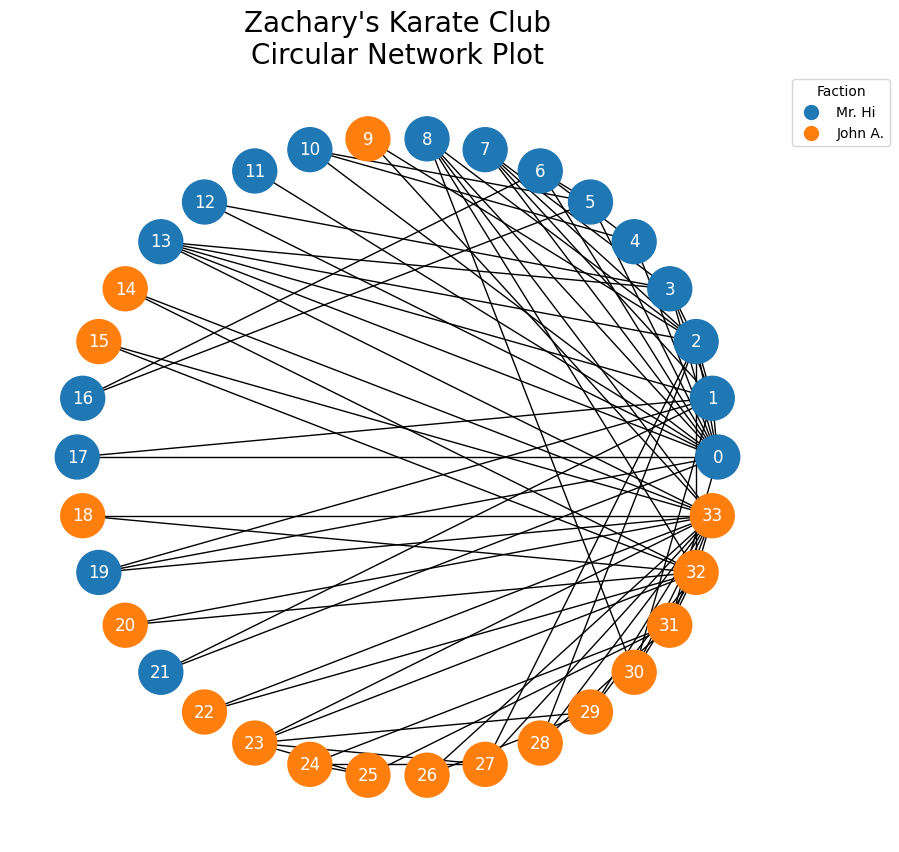

In [3]:
# color the nodes by faction
color = []
for node in G.nodes():
    if G.nodes.data()[node]["club"] == "Mr. Hi":
        color.append("C0")
    else:
        color.append("C1")

fig, ax = plt.subplots(figsize=(10, 10))
plt.axis("equal")
nx.draw_circular(
    G, with_labels=True, node_color=color, ax=ax, font_color="white", node_size=1000
)
ax.set_title("Zachary's Karate Club\nCircular Network Plot", fontsize=20)

# legend
john_a_legend = Line2D(
    [],
    [],
    markerfacecolor="C1",
    markeredgecolor="C1",
    marker="o",
    linestyle="None",
    markersize=10,
)

mr_hi_legend = Line2D(
    [],
    [],
    markerfacecolor="C0",
    markeredgecolor="C0",
    marker="o",
    linestyle="None",
    markersize=10,
)

ax.legend(
    [mr_hi_legend, john_a_legend],
    ["Mr. Hi", "John A."],
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title="Faction",
)
plt.show()

#### Conclusions from the Circular Graph

One clear and unsurprising conclusion from this graph is that Mr. Hi (`0`) and John A. (`33`) were popular, but it's hard to conclude much else.

Look at this graph for roughly 10 seconds, then ask yourself the following questions:

> How socially separated are the two factions? How long does it take to confirm there exists a connection between blue and orange?

> Are the connections between the two groups from people who are generally more social?

To answer the first question, we could certainly be more careful in ordering these nodes in our plot, partitioning orange from blue, but the second question would still be difficult.

#### An Alternative: Hive Plots

Hive Plots allow us to carefully choose both the axes on which to place nodes and how to align the nodes on those axes.

There is thus a lot of necessary declaration, but with the payoff of a far more interpretable network visualization.

To answer our above questions, we will structure our Hive Plot in the following way:

- We will construct a total of _4 axes_: 2 axes for the John A. faction, and 2 axes for the Mr. Hi Faction. This use of repeat axes allows us to see the intra-faction behavior in a well-defined way in our resulting visualization.

- We will look at _3 sets of edges_: edges within the John A. faction, edges within the Mr. Hi faction, and edges between the two factions. This will give us a clear answer to our first question above.

- We will sort one axis for each faction by _node degree_. This allows us to nicely answer our second question above, but more on this later.

Let's first calculate degree for all of our nodes, and simultaneously build the necessary data structures for `hiveplotlib`:

#### Convert the `networkx` structure into the needed `hiveplotlib` structure

In [4]:
# convert `networkx` graph into `hiveplotlib`-ready nodes and edges
nodes, edges = networkx_to_nodes_edges(G)

# pull out degree information from nodes
degrees = dict(G.degree)

# add degree information to Node instances
for node in nodes:
    node.add_data(data={"degree": degrees[node.unique_id]})

# also store node id as data for later use
for node in nodes:
    node.add_data(data={"loc": node.unique_id})

#### Constructing Our Hive Plot

Next, the `hiveplotlib` component. Let's build out a `BaseHivePlot()` instance.

Note, we use the low-level API for building a highly-customized example. For most users, the high-level API calls `hiveplotlib.hive_plot_n_axes()` and `hiveplotlib.viz.hive_plot_viz()` will both be plenty sufficient and allow one to generate hive plots with far less code. For more discussion / examples using the high-level API calls, see the [Quick Start Hive Plots](https://hiveplotlib.readthedocs.io/stable/quick_hive_plots.html) notebook.

In [5]:
karate_hp = BaseHivePlot()

### nodes ###

karate_hp.add_nodes(nodes)

### axes ###

axis0 = Axis(
    axis_id="hi_id",
    start=1,
    end=5,
    angle=-30,
    long_name="Mr. Hi Faction\n(Sorted by ID)",
)
axis1 = Axis(
    axis_id="hi_degree",
    start=1,
    end=5,
    angle=30,
    long_name="Mr. Hi Faction\n(Sorted by Degree)",
)
axis2 = Axis(
    axis_id="john_degree",
    start=1,
    end=5,
    angle=180 - 30,
    long_name="John A. Faction\n(Sorted by Degree)",
)
axis3 = Axis(
    axis_id="john_id",
    start=1,
    end=5,
    angle=180 + 30,
    long_name="John A. Faction\n(Sorted by ID)",
)

axes = [axis0, axis1, axis2, axis3]

karate_hp.add_axes(axes)

### node assignments ###

# partition the node data into "Mr. Hi" nodes and "John A." nodes
hi_nodes = karate_hp.nodes.data.loc[karate_hp.nodes.data.club == "Mr. Hi", :]
john_a_nodes = karate_hp.nodes.data.loc[karate_hp.nodes.data.club == "Officer", :]
# hi_nodes = [node.unique_id for node in nodes if node.data["club"] == "Mr. Hi"]
# john_a_nodes = [node.unique_id for node in nodes if node.data["club"] == "Officer"]

# assign nodes and sorting procedure to position nodes on axis
karate_hp.place_nodes_on_axis(
    axis_id="hi_id",
    node_df=hi_nodes,
    sorting_feature_to_use="loc",
    vmin=0,
    vmax=33,
)
karate_hp.place_nodes_on_axis(
    axis_id="hi_degree",
    node_df=hi_nodes,
    sorting_feature_to_use="degree",
    vmin=0,
    vmax=17,
)
karate_hp.place_nodes_on_axis(
    axis_id="john_degree",
    node_df=john_a_nodes,
    sorting_feature_to_use="degree",
    vmin=0,
    vmax=17,
)
karate_hp.place_nodes_on_axis(
    axis_id="john_id",
    node_df=john_a_nodes,
    sorting_feature_to_use="loc",
    vmin=0,
    vmax=33,
)

### edges ###

karate_hp.connect_axes(
    edges=edges, axis_id_1="hi_degree", axis_id_2="hi_id", color="C0"
)
karate_hp.connect_axes(
    edges=edges, axis_id_1="john_degree", axis_id_2="john_id", color="C1"
)
karate_hp.connect_axes(
    edges=edges, axis_id_1="hi_degree", axis_id_2="john_degree", color="C2"
)

0

As an extension of the `hiveplotlib` visualization, we will also pull out the John A. and Mr. Hi node placements to plot them in different colors in the final figure.

In [6]:
# pull out the location of the John A. and Mr. Hi nodes for visual emphasis later
john_a_degree_locations = karate_hp.axes["john_degree"].node_placements
john_a_node = (
    john_a_degree_locations.loc[
        john_a_degree_locations.loc[:, "unique_id"] == 33, ["x", "y"]
    ]
    .to_numpy()
    .flatten()
)

mr_hi_degree_locations = karate_hp.axes["hi_degree"].node_placements
mr_hi_node = (
    mr_hi_degree_locations.loc[
        mr_hi_degree_locations.loc[:, "unique_id"] == 0, ["x", "y"]
    ]
    .to_numpy()
    .flatten()
)

#### Visualizing the Hive Plot

Once the decisions are made above, all that remains is visualizing the Hive Plot in a `matplotlib` framework.

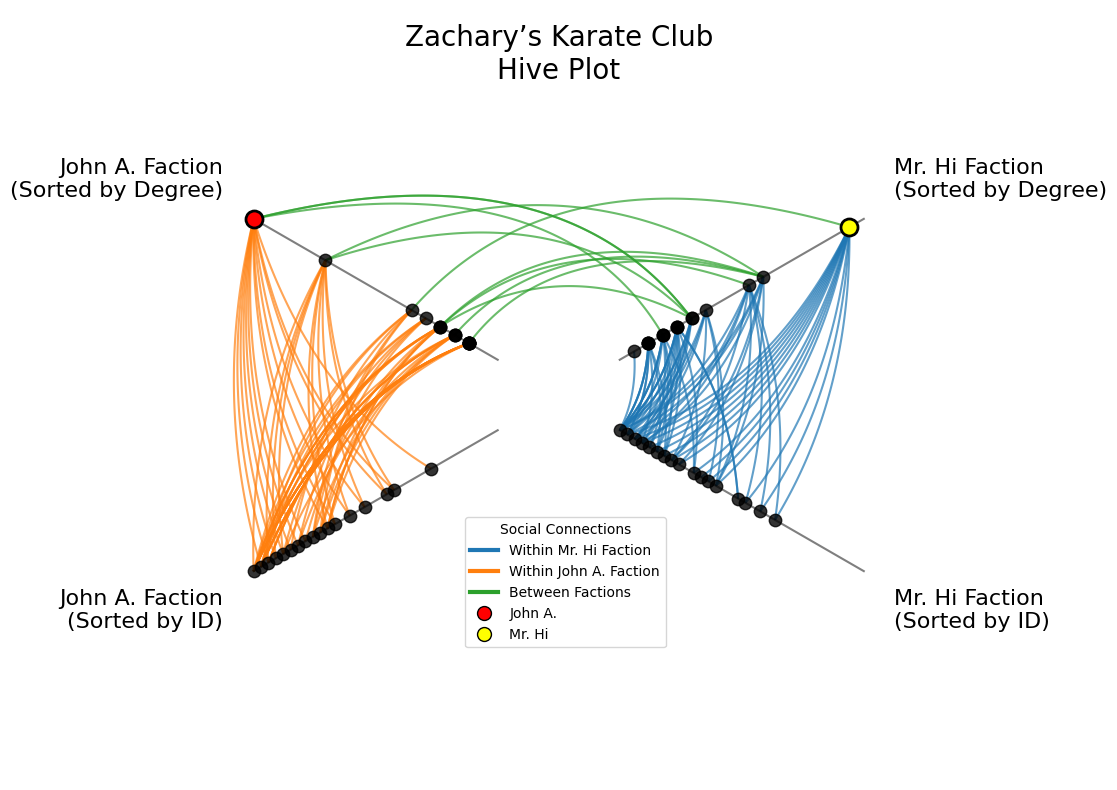

In [7]:
### Hive Plot ###

# plot axes
fig, ax = axes_viz(karate_hp)

# plot nodes
node_viz(karate_hp, fig=fig, ax=ax, s=80, color="black")

# highlight Mr. Hi and John. A on the degree axes
ax.scatter(
    john_a_node[0],
    john_a_node[1],
    facecolor="red",
    edgecolor="black",
    s=150,
    lw=2,
    zorder=2,
)
ax.scatter(
    mr_hi_node[0],
    mr_hi_node[1],
    facecolor="yellow",
    edgecolor="black",
    s=150,
    lw=2,
    zorder=2,
)

# plot edges
edge_viz(karate_hp, fig=fig, ax=ax, alpha=0.7, zorder=-1)

ax.set_title("Zachary’s Karate Club\nHive Plot", fontsize=20, y=0.9)

### legend ###

# edges
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=3, linestyle="-") for i in range(3)]

# John A. and Mr. Hi nodes
john_a_legend = Line2D(
    [],
    [],
    markerfacecolor="red",
    markeredgecolor="black",
    marker="o",
    linestyle="None",
    markersize=10,
)
custom_lines.append(john_a_legend)

mr_hi_legend = Line2D(
    [],
    [],
    markerfacecolor="yellow",
    markeredgecolor="black",
    marker="o",
    linestyle="None",
    markersize=10,
)
custom_lines.append(mr_hi_legend)

ax.legend(
    custom_lines,
    [
        "Within Mr. Hi Faction",
        "Within John A. Faction",
        "Between Factions",
        "John A.",
        "Mr. Hi",
    ],
    loc="upper left",
    bbox_to_anchor=(0.37, 0.35),
    title="Social Connections",
)
plt.show()

Let's revisit our questions from earlier:

> _How socially separated are the two factions? How long does it take to confirm there exists a connection between blue and orange?_

From this figure, there appear to be far more intra-faction connections than inter-faction connections, but we can clearly see inter-faction connections in green.

> _Are the connections between the two groups from people who are generally more social?_

There does not appear to be a particularly strong correlation between inter-faction connections and general sociability. Otherwise, there would be green connections only between nodes high on each of the degree axes.

The setup costs are of course higher to generate this Hive Plot visualization than the circular layout. We had to make the axes and sorting decisions. As a reward, however, we can generate unambiguous visualizations that can serve as first steps in answering genuine research questions.

#### References

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.